In [1]:
import pandas as pd

In [2]:
output_dirs = {
    "T5-Small": "2023-10-14/10-48-22",
    "T5-Large": "2023-10-14/10-47-44",
    "T5-3B": "2023-10-14/00-58-42",
    "T5-11B": "2023-10-14/00-58-12",
    # "FLAN-T5-Small": "2023-10-14/00-46-38",
    # "FLAN-T5-XL": "2023-10-14/00-46-39",
    # "t0_3b": "2023-10-14/00-10-47",


    # "T5-Small (Count)": "2023-10-18/17-59-55",
    # "T5-Large (Count)": "2023-10-18/21-26-26",
    # "T5-3B (Count)": "2023-10-18/21-28-37",
    # "T5-11B (Count)": "2023-10-18/21-29-05",
}

In [3]:
bins = [0.1 * i for i in range(0, 11)]
len(bins)

11

Text(0.5, 0.01, 'Normalized Confidence')

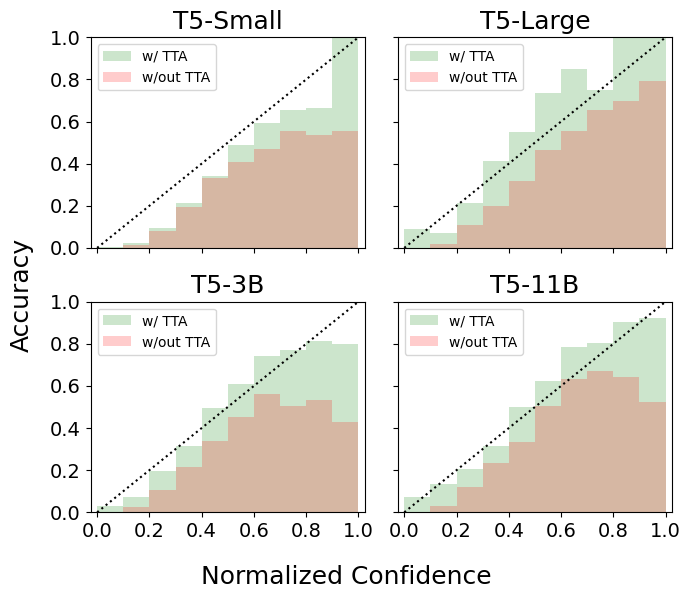

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharey=True, tight_layout=True)

def prepare_data(path):
    df = pd.read_json(path, lines=True)[['is_correct','normalized_confidence']]
    df['bin'] = pd.cut(df['normalized_confidence'], bins=bins, labels=[f'{(i+0.1):2}' for i in bins[:-1]])
    df = df.groupby('bin', observed=False).agg({'is_correct': ['sum', 'count', 'mean']}).reset_index(drop=False)
    df['bin'] = df['bin'].astype(str)
    df = df.fillna(0)

    filler_df = pd.DataFrame({'bin': [f'{(i+0.1):2}' for i in bins[:-1]], ('is_correct', 'mean'): [0.0 for i in bins[:-1]]})
    return df

def plot(df, ax, color, label):
    df.plot(
        x='bin',
        y=('is_correct', 'mean'),
        kind='bar',
        # title=model_name,
        ylim=(0, 1),
        xlim=(0, 1),
        ax=ax,
        alpha=0.2,
        width=1, 
        color=color,
        label=label,
    )


for n, (model_name, output_dir) in enumerate(output_dirs.items()):
    ax = axes[n // 2, n % 2]
    after = prepare_data(f"../outputs/{output_dir}/aggregated_generations/random_sample_0_30.jsonl")
    plot(after, ax, 'green', label='w/ TTA')
    before = prepare_data(f"../outputs/{output_dir}/aggregated_generations/random_sample_0_1.jsonl")
    plot(before, ax, 'red', label='w/out TTA')


    if n // 2 == 1:
        # ax.set_xlabel('Normalized Confidence')
        ax.set_xticks([-0.5] + [tick + 0.5 for i, tick in enumerate(ax.get_xticks()) if i%2==1])
        ax.set_xticklabels([f'{i/5}' for i in range(6)], rotation=0, fontsize=14)
        ax.set_xlabel(None)
    else:
        ax.set_xticks([-0.5] + [tick + 0.5 for i, tick in enumerate(ax.get_xticks()) if i%2==1])
        ax.set_xticklabels([])
        ax.set_xlabel(None)
    
    ax.set_ylabel(None)
    ax.set_yticks([i/5 for i in range(6)])
    ax.set_yticklabels([f'{i/5}' for i in range(6)], rotation=0, fontsize=14)
    ax.set_title(model_name, fontsize=18)

    ax.plot(np.linspace(-0.5, ax.get_xticks()[-1], 100), np.linspace(0, 1, 100), linestyle=':', color='black', label=None)
    # ax.set_xlim(-0.5, ax.get_xticks()[-1])

fig.supylabel('Accuracy', fontsize=18)
fig.supxlabel('Normalized Confidence', fontsize=18)

In [6]:
fig.savefig('eval_xconf_yacc.pdf')